# NASA Exoplanets

## Binary Classification of Habitable Exoplanets

Import libraries and upload the dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer


# upload the dataset
df = pd.read_csv("exoplanets_with_habitability.csv")


# Exploratory data analysis

In [ ]:
# Print the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (5250, 14)


In [ ]:
# Get the first 5 rows of the dataset
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,Habitable
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0


In [ ]:
# Get information about each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
 13  Habitable          5250 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 574.3+ KB


Data types are correctly defined.

In [ ]:
# Get statistics on each column of the dataset
df.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,Habitable
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568,0.012190
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424,0.109746
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000,0.000000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000,0.000000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000,1.000000


Signs of outliers in our dataset.

In [ ]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


No duplicates in our dataset.

In [ ]:
# count the number of each planet type
print(df['Habitable'].value_counts())

0    5186
1      64
Name: Habitable, dtype: int64


Highly imbalanced, habitable planets have a significantly lower frequency compared to other non-habitable ones. The distribution of non-habitable planets is around 99% (5145 examples)  whereas it is around 1% (64 examples) for habitable planets.

### Missing Values Detection

In [ ]:
# Check missing values
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
Habitable              0
dtype: int64

In [ ]:
# Count the total number of rows with null values
total_rows_with_null = df.isnull().any(axis=1).sum()

print("Total rows with null values:", total_rows_with_null)

Total rows with null values: 485


In total, the data set has 9% of rows with missing values. In order to avoid data loss, the missing values are replaced with the mean if possible.

# Data preprocessing

### Outlier Handling

**Distance**

<Axes: xlabel='Habitable', ylabel='distance'>

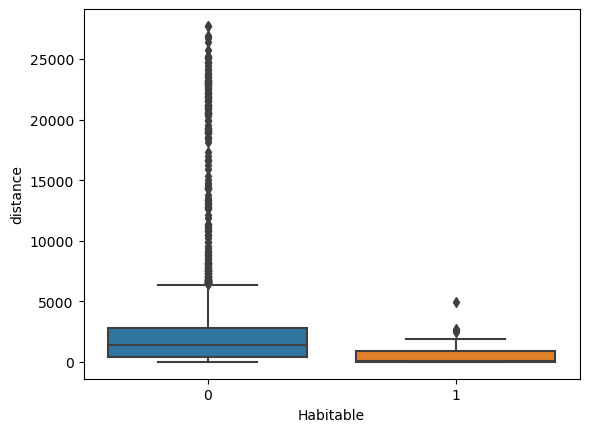

In [ ]:
sns.boxplot(x="Habitable", y="distance", data=df)

**Distance:** No remarkable outliers. We can see that habitable planets are much closer from earth in distance.

**Stellar Magnitude**

<Axes: xlabel='Habitable', ylabel='stellar_magnitude'>

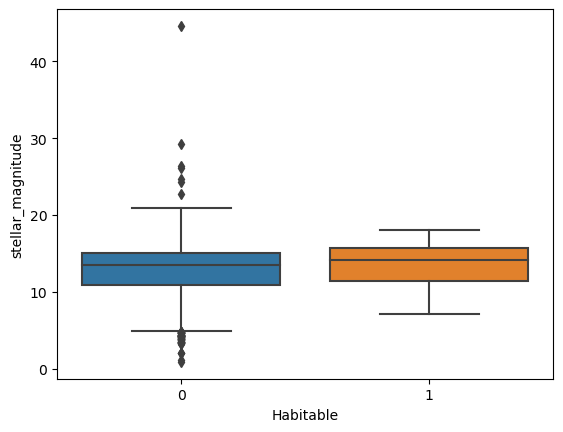

In [ ]:
sns.boxplot(x="Habitable", y="stellar_magnitude", data=df)

In [ ]:
# Find the name of the planet with stellar magnitude > 40
df[df['stellar_magnitude'] > 40]['name']

4617    MOA-bin-29 b
Name: name, dtype: object

**Stellar Magnitude:** MOA-bin-29 b (Gas Giant) is an outlier, as it has a significantly higher stellar magnitude than other planets. In general, all planets tend to have a brightness around 15 and on average the Gas Giant tend to have a lower stellar magnitude compared to the other planets. Therefore, non-habitable planets have a wider range of stellar magnitude as Gas Giants are not habitable planets.

**Mass Multipler**

<Axes: xlabel='Habitable', ylabel='mass_multiplier'>

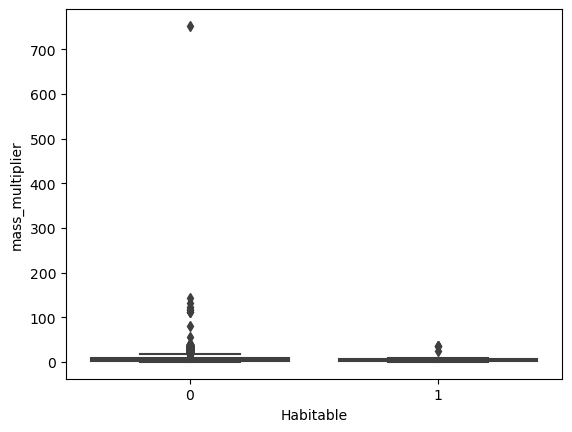

In [ ]:
sns.boxplot(x="Habitable", y="mass_multiplier", data=df)

In [ ]:
# Find the name of planet with mass mutliplier > 500
df[df['mass_multiplier'] > 500]['name']

466    HD 100546 b
Name: name, dtype: object

**Mass Multiplier:**  HD 100546 b (Gas Giant) is an outlier. It has a significantly high mass compared to all other planets, and is a non-habitable planet.


**Radius Multiplier**

<Axes: xlabel='Habitable', ylabel='radius_multiplier'>

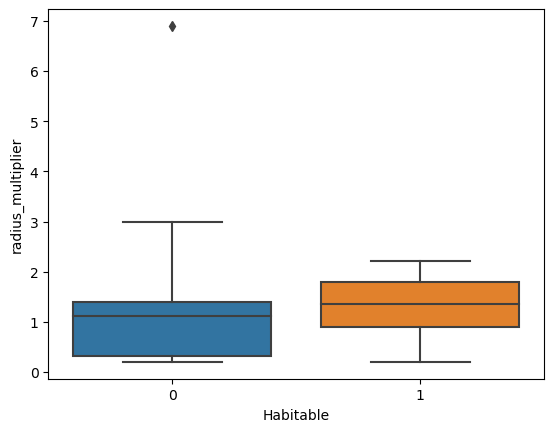

In [ ]:
sns.boxplot(x="Habitable", y="radius_multiplier", data=df)

In [ ]:
# Find the name of radius multiplier > 6
df[df['radius_multiplier'] > 6]['name']

466    HD 100546 b
Name: name, dtype: object

**Radius Multiplier:**  HD 100546 b (Gas Giant) is an outlier. It has a significantly high radius compared to all other planets.

**Orbital Radius**

<Axes: xlabel='Habitable', ylabel='orbital_radius'>

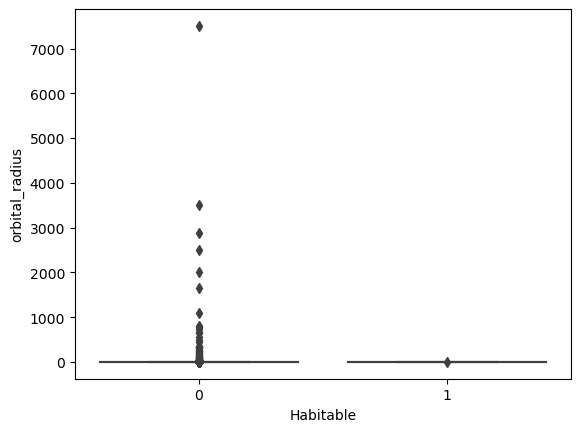

In [ ]:
sns.boxplot(x="Habitable", y="orbital_radius", data=df)

In [ ]:
# Find name of planet with orbital radius > 5000
df[df['orbital_radius'] > 5000]['name']

84    COCONUTS-2 b
Name: name, dtype: object

**Orbital Radius:** COCONUTS-2 b (Gas Giant) is an outlier, as it has a significantly high orbital radius. The outlier is a non-habitable planet.

**Orbital Period**

<Axes: xlabel='Habitable', ylabel='orbital_period'>

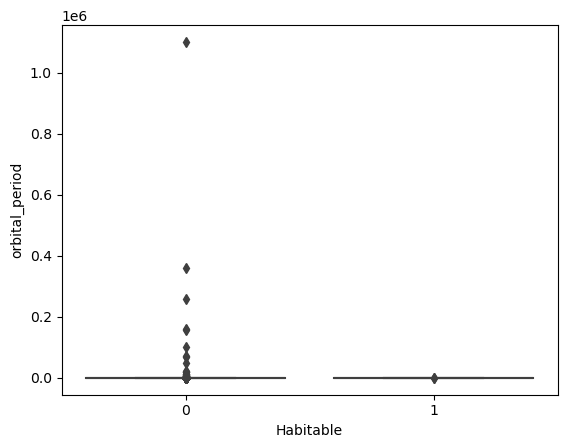

In [ ]:
sns.boxplot(x="Habitable", y="orbital_period", data=df)

In [ ]:
# Find name of the planet with orbital period > 1000000
df[df['orbital_period'] > 1000000]['name']

84    COCONUTS-2 b
Name: name, dtype: object

**Orbital Period:** COCONUTS-2 b (Gas Giant) is an outlier, as it has a significantly high orbital period. The outlier is a non-habitable planet.

**Eccentricity**

<Axes: xlabel='Habitable', ylabel='eccentricity'>

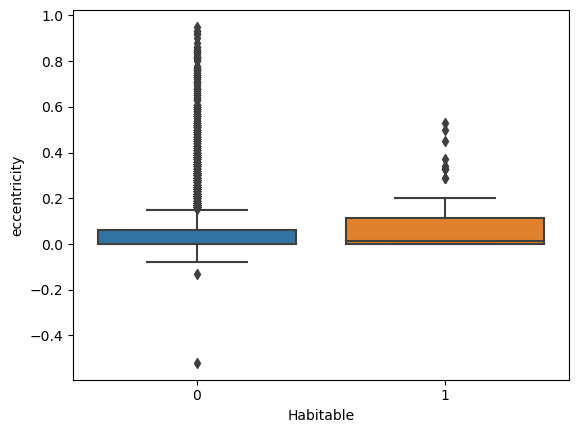

In [ ]:
sns.boxplot(x="Habitable", y="eccentricity", data=df)

In [ ]:
# Find names of the planets with eccentricity < 0
df[df['eccentricity'] < 0]['name']

679     HD 155918 b
883     HD 217786 c
1172     HD 93351 b
Name: name, dtype: object

**Eccentricity:** HD 155918 b - HD 217786 - c HD 93351 b (Super Earth and Neptune like) are outliers.

Note that eccentricity describes the shape of an orbit around a celestial body, such as a star or a planet. It measures how much the orbit deviates from a perfect circle. According to Rodger, B. et al. (2020) is eccentricity a non-negative number that defines its shape, which can only take values between 0 and 1.

### Drop Outliers
In the following, the detected outliers will be dropped in order to avoid any distortions in our data.

In [ ]:
# drop HD 155918 b, HD 217786 c, HD 93351 b, COCONUTS-2 b, HD 100546 b, MOA-bin-29 b
df = df.drop(df[df['name'] == 'HD 155918 b'].index)
df = df.drop(df[df['name'] == 'HD 217786 c'].index)
df = df.drop(df[df['name'] == 'HD 93351 b'].index)
df = df.drop(df[df['name'] == 'COCONUTS-2 b'].index)
df = df.drop(df[df['name'] == 'HD 100546 b'].index)
df = df.drop(df[df['name'] == 'MOA-bin-29 b'].index)

In [ ]:
df.shape

(5244, 14)

## Adjust mass and radius calculations

### Check unique values for adjusting  

In [ ]:
# check unique mass_wrt
df['mass_wrt'].unique()

array(['Jupiter', 'Earth', nan], dtype=object)

In [ ]:
# check unique radius_wrt
df['radius_wrt'].unique()

array(['Jupiter', 'Earth', nan], dtype=object)

Mass_wrt and radius_wrt are labels, therefore we can not replace null values with mean for those columns. Without further knowledge we can not estimate a label. Therefore, we drop them after we use them for calculating mass_earth and radius_earth.

The mean can be inserted to replace null values for the columns "distance", "stellar_magnitude" and "orbital_radius". However we want to start with outlier detection before handling missing values for these columns.

### Adjust values

Since mass and radius are specified as a function of Earth or Jupiter, they must be equated so that they are on the same scale.

**Mass:** According to Williams, David R. ( 2021) from NASA, Jupiter is 317.83 times heavier than Earth. Therefore, in the next step, any mass given in Jupiter units is multiplied by 317.83.

In [ ]:
def calculate_mass_earth(row):
    if row['mass_wrt'] == 'Jupiter':
        return row['mass_multiplier'] * 317.83
    else:
        return row['mass_multiplier']

df['mass_earth'] = df.apply(calculate_mass_earth, axis=1)
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,Habitable,mass_earth
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0,6165.902000
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0,4684.814200
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0,1525.584000
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0,2586.757982
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0,565.737400


**Radius:** According to NASA, Jupiter's radius is 10.97 times bigger than Earth's. Therefore, a new column is created which scales the radius in relation to Earth.

In [ ]:
def calculate_radius_earth(row):
    if row['radius_wrt'] == 'Jupiter':
        return row['radius_multiplier'] * 10.97
    else:
        return row['radius_multiplier']

df['radius_earth'] = df.apply(calculate_radius_earth, axis=1)
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,Habitable,mass_earth,radius_earth
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0,6165.902000,11.8476
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0,4684.814200,11.9573
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0,1525.584000,12.6155
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0,2586.757982,12.2864
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0,565.737400,13.1640


For clearity, the four original columns (mass_multiplier, mass_wrt, radius_multiplier and radius_wrt) will be dropped in the following:

In [ ]:
df.drop(columns=['mass_multiplier', 'mass_wrt', 'radius_multiplier', 'radius_wrt'], inplace=True)

df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,Habitable,mass_earth,radius_earth
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,0,6165.902000,11.8476
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,0,4684.814200,11.9573
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,0,1525.584000,12.6155
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,0,2586.757982,12.2864
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,0,565.737400,13.1640


In [ ]:
df.shape

(5244, 12)

### Handling Missing Values

We want to impute the missing values for distance, stellar magnitude and orbital radius. We use simple imputer to find the mean. To get a more accurate result we will take the mean of the *planet type* the data point belongs to.

<Axes: xlabel='planet_type', ylabel='stellar_magnitude'>

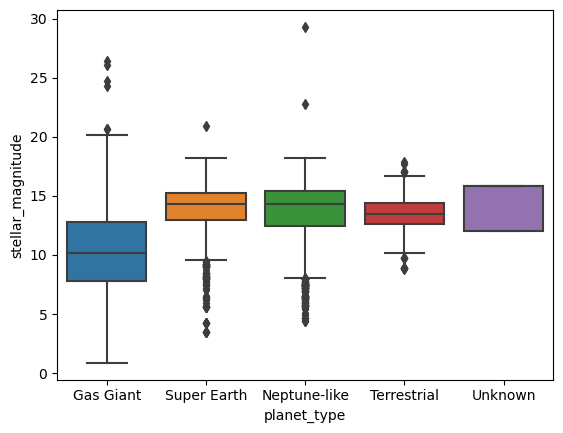

In [ ]:
sns.boxplot(x="planet_type", y="stellar_magnitude", data=df)

<Axes: xlabel='planet_type', ylabel='distance'>

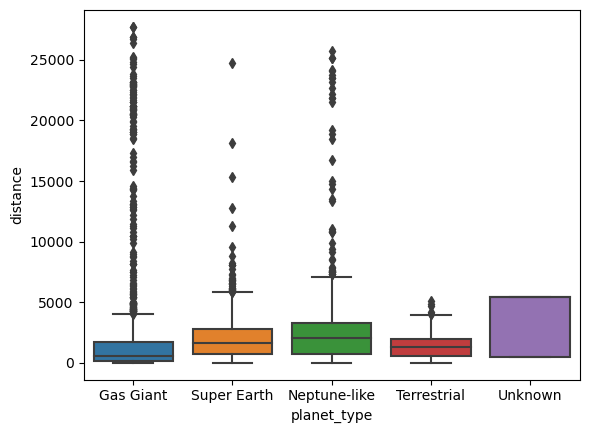

In [ ]:
sns.boxplot(x="planet_type", y="distance", data=df)

<Axes: xlabel='planet_type', ylabel='orbital_radius'>

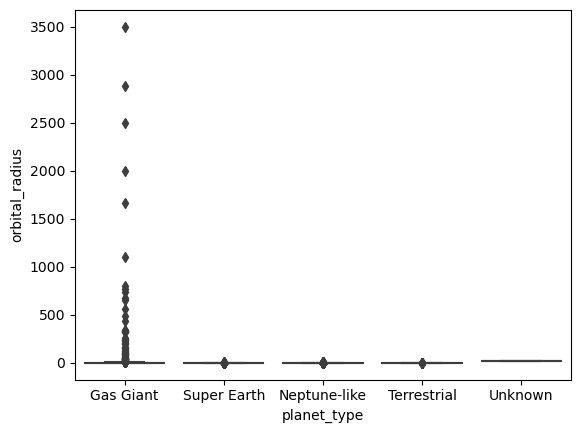

In [ ]:
sns.boxplot(x="planet_type", y="orbital_radius", data=df)

We can see that the stellar magnitude, distance and orbital radius are differently distributed depending on planet types - implying that calculating the mean based on planet type will give a more accurate result when imputing for missing values for these columns.

In [ ]:
grouped = df.groupby('planet_type')

imputer = SimpleImputer(strategy='mean')

# Columns to impute
columns_to_impute = ['distance', 'stellar_magnitude', 'orbital_radius']

# Impute missing values within each group for the selected columns
for column in columns_to_impute:
    df[column] = grouped[column].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

In [ ]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,Habitable,mass_earth,radius_earth
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,0,6165.902000,11.8476
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,0,4684.814200,11.9573
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,0,1525.584000,12.6155
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,0,2586.757982,12.2864
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,0,565.737400,13.1640


In [ ]:
df.isnull().sum()

name                  0
distance              0
stellar_magnitude     0
planet_type           0
discovery_year        0
orbital_radius        0
orbital_period        0
eccentricity          0
detection_method      0
Habitable             0
mass_earth           23
radius_earth         17
dtype: int64

After imputing for missing values in the columns 'distance', 'stellar_magnitude', 'orbital_radius' we only have missing values in the columns 'mass_earth', 'radius_earth'.

In [ ]:
df = df.dropna(subset=['mass_earth', 'radius_earth'])
df.isna().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
Habitable            0
mass_earth           0
radius_earth         0
dtype: int64

In [ ]:
df.shape

(5209, 12)

Moving forward, the missing values for 'mass_earth' and 'radius_earth' are dropped. After addressing the missing values, our dataset contained 5,209 rows, equivalent to 99.2% of all rows in the original dataset.


## Feature Analysis

**Pair plot - different planet types**

Provides insights into the different characteristics of planet types

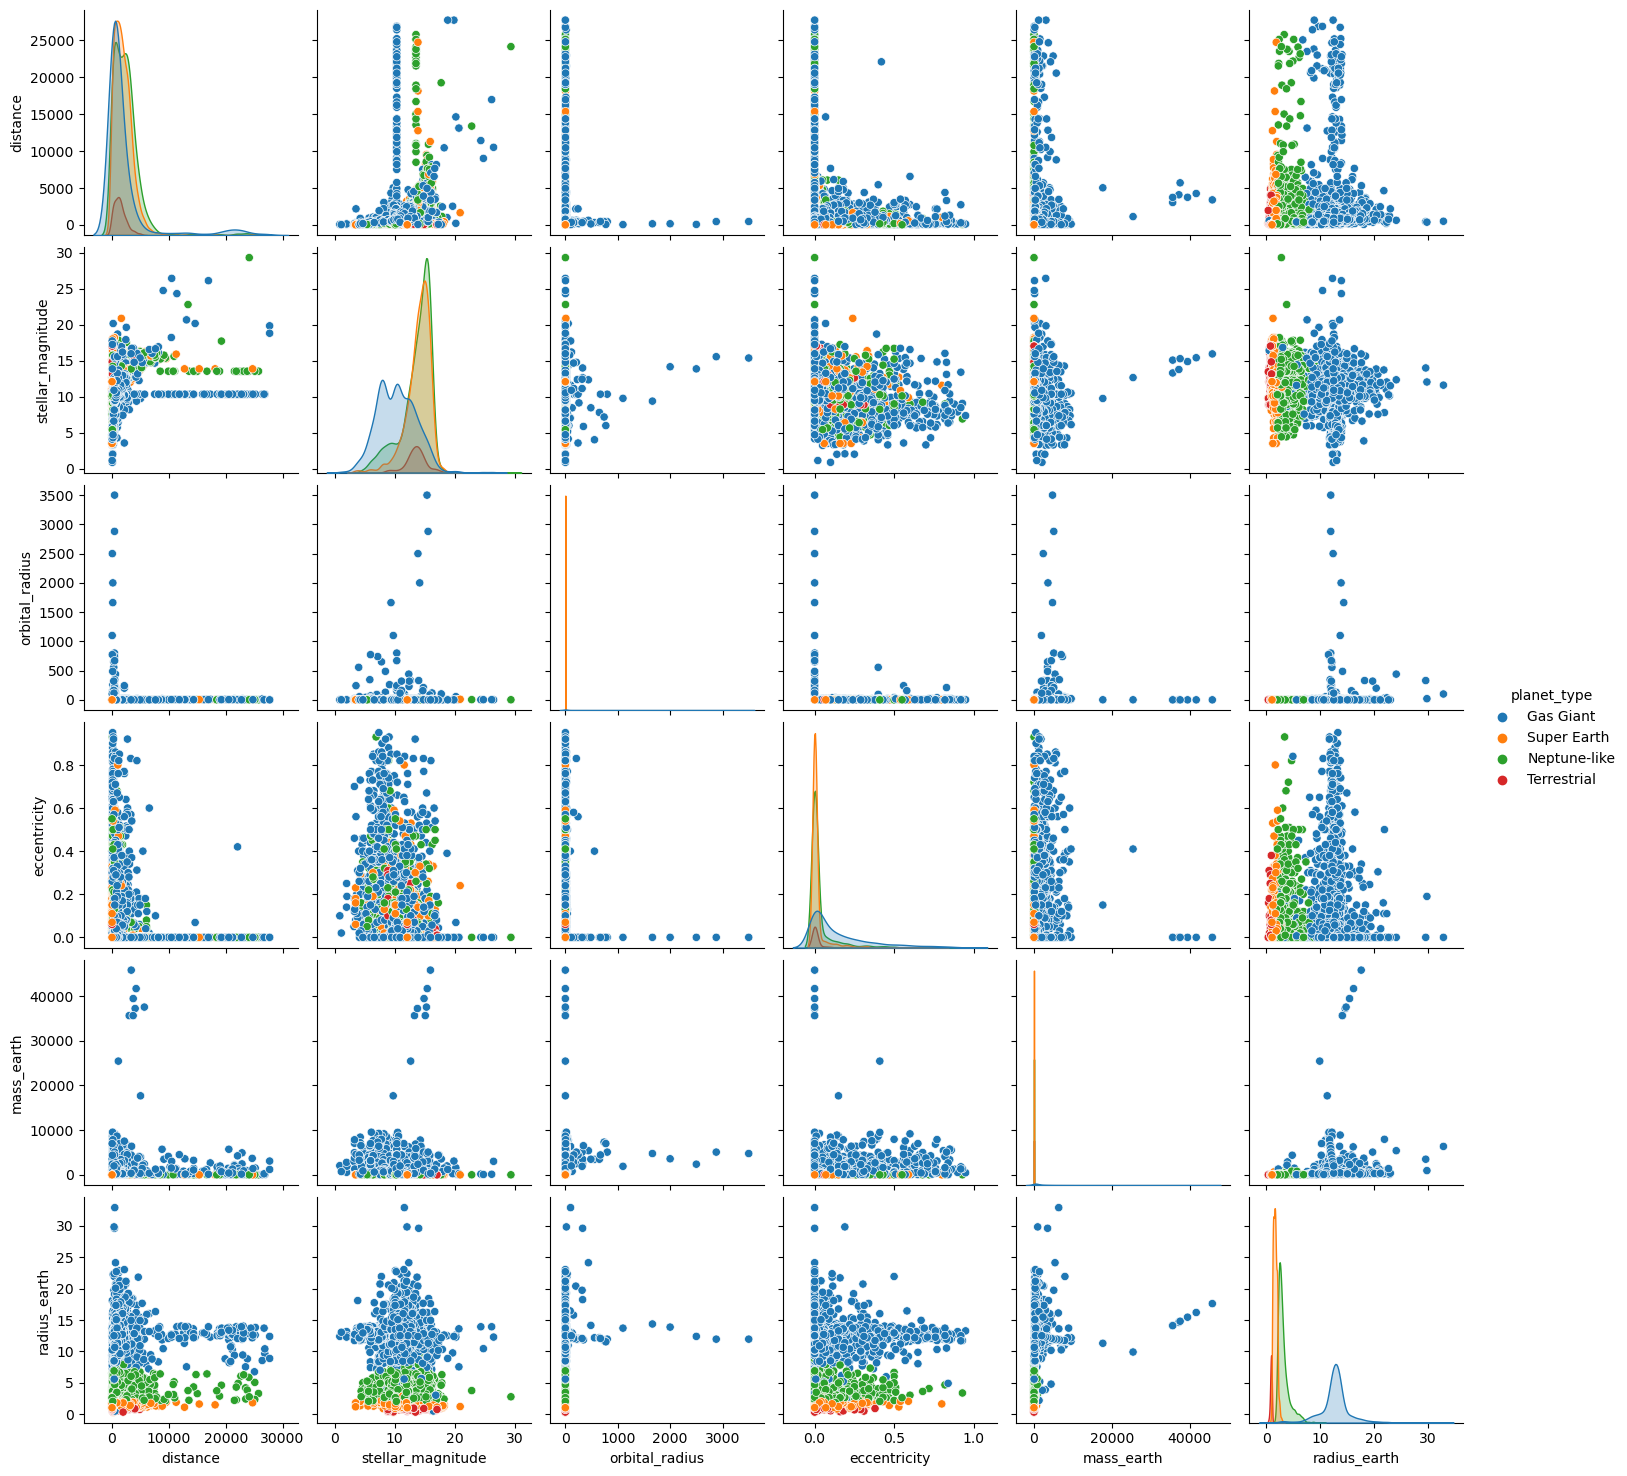

In [ ]:
columns_to_include = ['distance', 'stellar_magnitude', 'orbital_radius','eccentricity', 'mass_earth', 'radius_earth', 'planet_type']
subset_df = df[columns_to_include]
sns.pairplot(subset_df, hue="planet_type")

**Histogram - Frequency of detected planets for each discovery year**

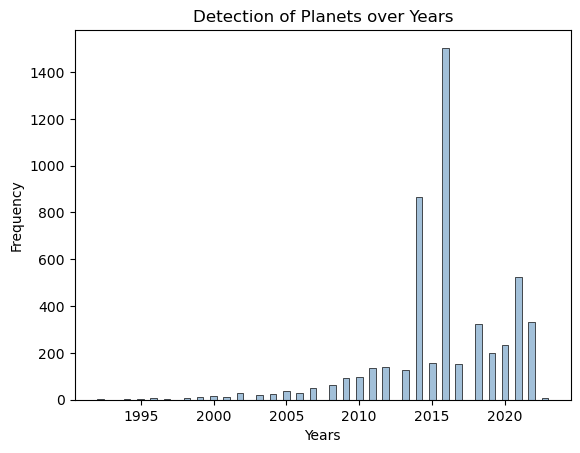

In [ ]:
#Histogram
sns.histplot(data=df, x="discovery_year", color = 'steelblue', alpha = 0.5)
plt.title("Detection of Planets over Years")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

**Findings:**

We can see that a lot of exoplanets were discovered in 2014 and 2016.
A new mission called K2 was launched in June 2014. In May 2016, the Kepler mission made a historic achievement. For the first time, over 1,200 exoplanets were discovered, 40% of which were rocky planets with similar properties to our Earth (National Aeronautics and Space Administration, n.d.).

Since the year of discovery increases the dimensionality of our data and has no significant predictive power, we eliminate this from our dataset. Keeping the year could pose an overfitting risk that we want to avoid.

In [ ]:
df.drop(columns=['discovery_year'],inplace=True)

C:\Users\Elfur Örlygsdóttir\AppData\Local\Temp\ipykernel_50692\4159371917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['discovery_year'],inplace=True)


**Bar plot - Planet type distribution for each detection method**


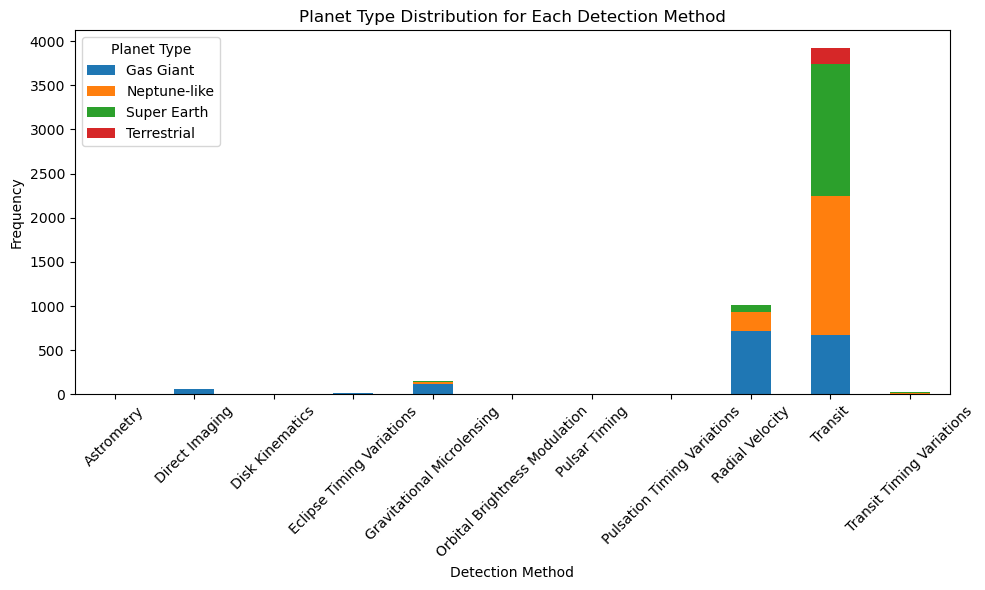

In [ ]:
# Group the data by 'detection_method' and 'planet_type' and count the occurrences
grouped_data = df.groupby(['detection_method', 'planet_type']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Detection Method')
plt.ylabel('Frequency')
plt.title('Planet Type Distribution for Each Detection Method')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Planet Type')
plt.tight_layout()

plt.show()

**Findings**

The detection method is unbalaced, a high percentage of all planets are detected by Radial Velocity and Transit. Besides this there is not a significant difference in methods for each planet type. Therefore we conclude with the same assumption as discovery year, that this column is increases the dimensionality of our data and has no significant predictive power, we eliminate this from our dataset.

In [ ]:
df.drop(columns=['detection_method'],inplace=True)

C:\Users\Elfur Örlygsdóttir\AppData\Local\Temp\ipykernel_50692\2248348711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['detection_method'],inplace=True)


Furthermore, the planet name will also be dropped in the following as it does not have any prediction power.

In [ ]:
df.drop(columns=['name'],inplace=True)

C:\Users\Elfur Örlygsdóttir\AppData\Local\Temp\ipykernel_50692\2549807624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['name'],inplace=True)


In [ ]:
# Print the dataset after dropping the columns
df.head()

,distance,stellar_magnitude,planet_type,orbital_radius,orbital_period,eccentricity,Habitable,mass_earth,radius_earth
0,304.0,4.72307,Gas Giant,1.290000,0.892539,0.23,0,6165.902000,11.8476
1,409.0,5.01300,Gas Giant,1.530000,1.400000,0.08,0,4684.814200,11.9573
2,246.0,5.23133,Gas Giant,0.830000,0.508693,0.00,0,1525.584000,12.6155
3,58.0,6.61935,Gas Giant,2.773069,4.800000,0.37,0,2586.757982,12.2864
4,69.0,6.21500,Gas Giant,1.660000,2.200000,0.68,0,565.737400,13.1640


## Feature Selection

In [ ]:
# Label encode planet type since it is a categorical feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['planet_type'] = label_encoder.fit_transform(df['planet_type'])

C:\Users\Elfur Örlygsdóttir\AppData\Local\Temp\ipykernel_50692\2145646303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['planet_type'] = label_encoder.fit_transform(df['planet_type'])


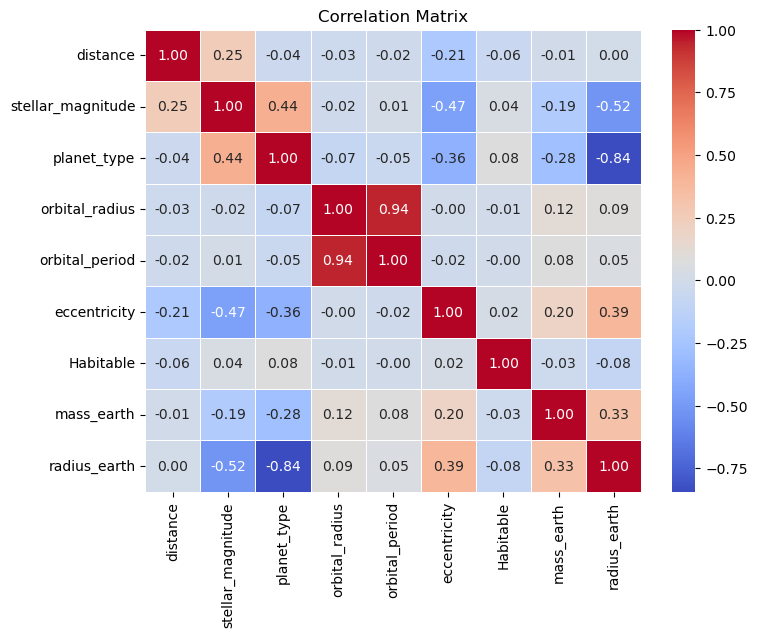

In [ ]:
# One hot encode planet type for makeing a correlation matrix
df_corr_matrix = df

corr_matrix = df_corr_matrix.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Findings:** This heatmap represents the correlation matrix of various features in the exoplanet dataset. The features include distance, stellar magnitude, orbital radius, orbital period, eccentricity, habitability, mass (in Earth masses), and radius (in Earth radius).

**Key observations:**
- There is a very high positive correlation between 'orbital_radius' and 'orbital_period' (0.94), indicating multicollinearity.
- 'Planet_type' shows a strong negative correlation with 'radius_earth' (-0.84) and a moderate negative correlation with 'eccentricity' (-0.36) and 'mass_earth' (-0.28).
- 'Stellar_magnitude' has moderate negative correlations with 'eccentricity' (-0.47) and 'radius_earth' (-0.52).

Based on this analysis, we decided to drop 'orbital_period' and 'planet_type' from our dataset to address multicollinearity and simplify our feature set, this will help in reducing redundancy and potential overfitting in our machine learning models.

In [ ]:
# Drop 'orbital_period' and 'planet_type' due to multicollinearity
df.drop(columns=['orbital_period', 'planet_type'], inplace=True)

C:\Users\Elfur Örlygsdóttir\AppData\Local\Temp\ipykernel_50692\3645723161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['orbital_period', 'planet_type'], inplace=True)


## Dataset Split

We split out data into:
- 70% Training - used to train the model
- 15% Evaluation - used to tune the hyperparameters
- 15% Testing - used to confirm that the model works

In [ ]:
habitable_count = df['Habitable'].value_counts().get(1, 0)
print(f"Number of habitable planets: {habitable_count}")

Number of habitable planets: 64


In [ ]:
# 70% training, 15% validation, 15% testing
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Habitable'])
y = df['Habitable']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the testing set further into validation and testing sets (50% each of the testing set)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3646, 6)
Validation set shape: (781, 6)
Testing set shape: (782, 6)


In [ ]:
# Check habitable distribution in the training set
y_train.value_counts()

0    3608
1      38
Name: Habitable, dtype: int64

In [ ]:
# Check planet distribution in the test set
y_test.value_counts()

0    770
1     12
Name: Habitable, dtype: int64

In [ ]:
# Check planet distribution in the validation set
y_val.value_counts()

0    767
1     14
Name: Habitable, dtype: int64

### Export the data

In [ ]:
# Testing data
df_test = pd.concat([X_test, y_test], axis=1)
df_test.to_csv('Habitable_Test.csv', index=False)

# Validation data
df_val = pd.concat([X_val, y_val], axis=1)
df_val.to_csv('Habitable_Val.csv', index=False)

## Handling Data Imbalance

In [ ]:
def CreateVisualization(X_train_resampled, y_train_resampled, df, title):
    plt.figure(figsize=(6, 6.5))
    ax=sns.histplot(data=df, x="Habitable", color='steelblue', alpha=0.5, discrete=True)
    for patch in ax.patches:
        patch.set_width(0.8)
    plt.title(title)
    plt.xlabel("Types of Planets")
    plt.ylabel("Frequency")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

**Barplot - Frequency of habitable planets in imbalanced Data Training set**

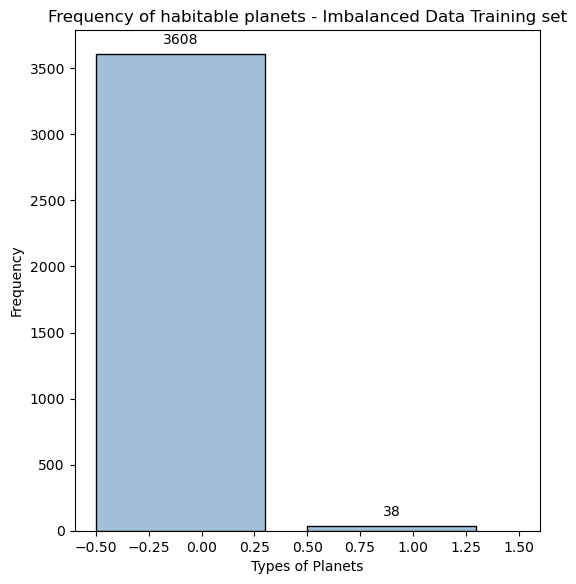

In [ ]:
df_train = pd.concat([X_train, y_train],axis=1)
CreateVisualization(X_train, y_train, df_train, "Frequency of habitable planets - Imbalanced Data Training set")

**Findings:** Significant imbalance, habitable planets are a minority class. This needs to be addressed before classification.

In [ ]:
from imblearn.over_sampling import SMOTE

# Set the minority class to 30% of the majority class
smote = SMOTE(sampling_strategy={1: 1082}, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_train_resampled and y_train_resampled contain the resampled data
df_train_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.Series(y_train_resampled, name='Habitable')], axis=1)


**Barplot - Frequency of habitable planets in balanced Data Training set**

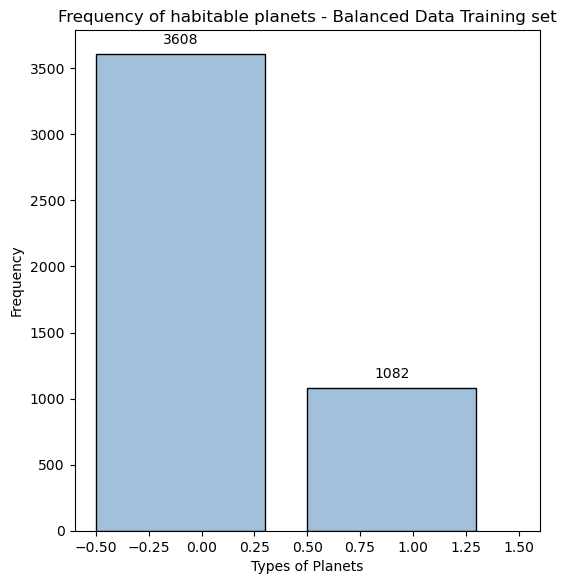

In [ ]:
CreateVisualization(X_train_resampled, y_train_resampled, df_train_resampled, "Frequency of habitable planets - Balanced Data Training set")

In [ ]:
df_train_resampled.to_csv('Habitable_Train_Balanced.csv', index=False)

### Balance the full dataset to use for cross validation

**Barplot - Frequency of habitable planets in imbalanced full dataset**

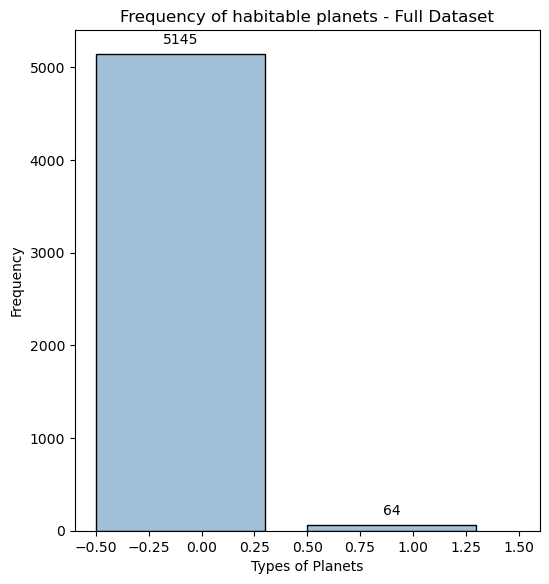

In [ ]:
CreateVisualization(X, y, df, "Frequency of habitable planets - Full Dataset")

In [ ]:
# Set the minority class to 30% of the majority class
smote = SMOTE(sampling_strategy={1: 1544}, random_state=0)
X_full_resampled, y_full_resampled = smote.fit_resample(X, y)

# X_full_resampled and y_full_resampled contain the resampled data
df_full_resampled = pd.concat([pd.DataFrame(X_full_resampled, columns=X.columns), pd.Series(y_full_resampled, name='Habitable')], axis=1)

**Barplot - Frequency of habitable planets in balanced Data Training set**

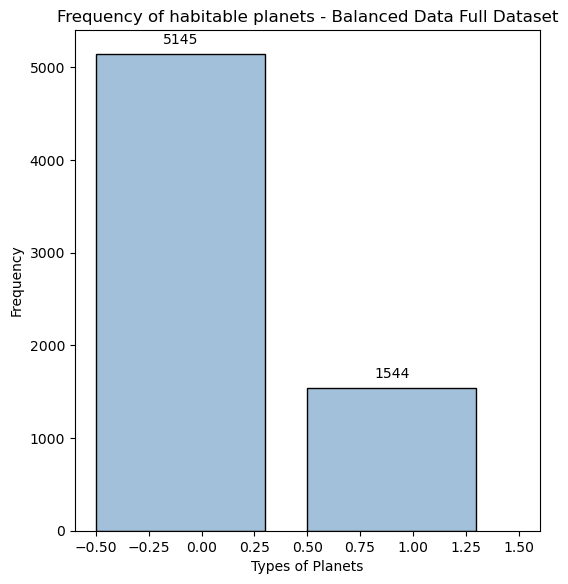

In [ ]:
CreateVisualization(X_full_resampled, y_full_resampled, df_full_resampled, "Frequency of habitable planets - Balanced Data Full Dataset")

In [ ]:
df_full_resampled.to_csv('Habitable_Full_Balanced.csv', index=False)

**Scatterplots - Habitable vs. Non-Habitable Planets Before and After Applying SMOTE.**
Scatterplots for Habitable vs. Non-Habitable Planets Before and After Applying SMOTE. These scatterplots visualize the relationship between eccentricity and stellar magnitude, color-coded by habitability (0 = not habitable, 1 = habitable). The left plot shows the original dataset before applying SMOTE, and the right plot shows the dataset after applying SMOTE to balance the classes.



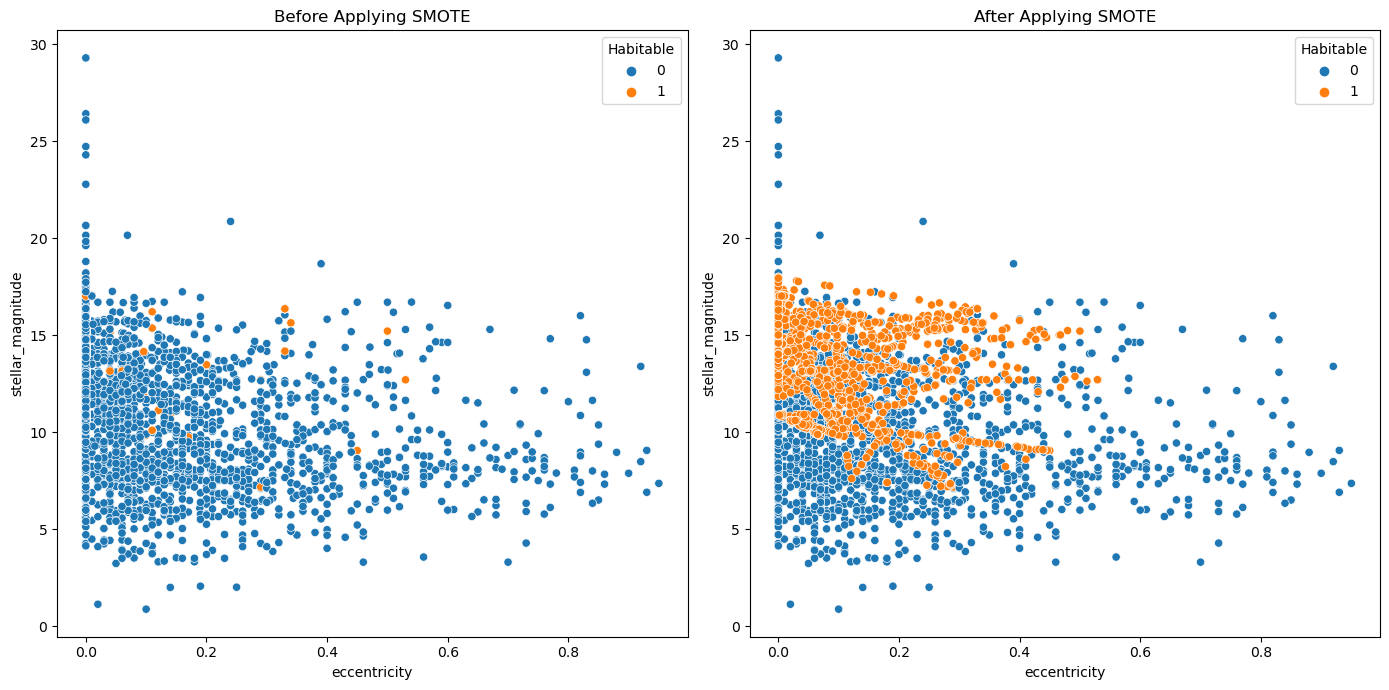

In [ ]:
columns_to_include = ['distance', 'stellar_magnitude', 'orbital_radius','eccentricity', 'mass_earth', 'radius_earth', 'Habitable']
subset_df_full_resampled = df_full_resampled[columns_to_include]

columns_to_include = ['distance', 'stellar_magnitude', 'orbital_radius', 'eccentricity', 'mass_earth', 'radius_earth', 'Habitable']
subset_df = df[columns_to_include]

# Plot before applying SMOTE
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=subset_df, x='eccentricity', y='stellar_magnitude', hue='Habitable')
plt.title('Before Applying SMOTE')


# Plot after applying SMOTE
plt.subplot(1, 2, 2)
sns.scatterplot(data=subset_df_full_resampled, x='eccentricity', y='stellar_magnitude', hue='Habitable')
plt.title('After Applying SMOTE')

plt.tight_layout()
plt.show()

**Findings:**

*1. Class Imbalance:*
- Before applying SMOTE, there is a significant class imbalance, with very few habitable planets (orange) compared to non-habitable planets (blue).
- After applying SMOTE, the number of habitable planets is increased, creating a more balanced dataset.

*2. Distribution of Habitable Planets:*
- Before SMOTE: Habitable planets are sparsely distributed, making it difficult for the model to learn from these few samples.
- After SMOTE: Habitable planets are more evenly distributed across the feature space, especially in the regions where non-habitable planets are also present.

*4. Synthetic Data:*
- The synthetic data points generated by SMOTE follow the distribution of the minority class (habitable planets) and blend into the existing data points, enhancing the model's ability to generalize.

**Conclusion:**
Applying SMOTE has effectively addressed the class imbalance, providing a more balanced dataset that can improve the performance of machine learning models in predicting planet habitability. However, further analysis and feature engineering may be needed to identify additional features that can better separate habitable from non-habitable planets.
